# Steinschlagrisiko Challenge FS24 CWM1

## Einleitung
### Aufgabenstellung
Die Kantonsstrasse unterhalb Schiers (GR) ist vom Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Der Kantonsingenieur hat sie beauftragt, anhand von vorhanden Daten die Wahrscheinlichkeit eines Todesfalls zu berechnen und eine Empfehlung bezüglich der Schliessung bzw Offenhaltung der Strasse auszusprechen.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.002 ist. Für die Berechnungen soll ein gut strukturierter und dokumentierter Code in Python oder R entwickelt werden.

### Grundlagen
Für die Planung der neuen Sicherheitsnetze, hat ein beauftragter Geologe, über drei Monate Daten zu den Steinschlagereignisse aufgenommen. Dabei wurde Steingeschwindigkeit, Steinmasse und Zeitpunkt und der Zeitpunkt des Ereignis registriert. Diese Daten können von Ihnen zur Modellbildung verwendet werden und stehen unter folgenden Links zur Verfügung:

Ereignis aus Ablösungszone 1: https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=0

Ereignis aus Ablösungszone 2: https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=0

NB: Die Geschwindigkeit ist durch einen Radar aufgenommen und sehr präzise. Die Masse ist eine Experten-Schätzung des Geologen.

Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1200 kJ sicher sind. Falls bereits Steine mit Gesamtmasse über 2000kg in den Sicherheitsnetzen liegen, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 600 kJ. Steine in den Sicherheitsnetze werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

Das tägliche Verkehrsaufkommen beträgt 600 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h.

## Data Wrangling

In [26]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [27]:
# ensure charts are displayed inline within the Jupyter notebook directly below the code cell that produced it
%matplotlib inline

In [28]:
# load data
df1 = pd.read_csv('../daten/out_1.csv')
df2 = pd.read_csv('../daten/out_2.csv')

# show first lines
display(df1.head())
display(df2.head())

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,2019-01-01,09:00,194.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,21:00,224.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,14:00,3104.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,15:00,228.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,23:00,755.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Uhrzeit,m [kg],v [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019-01-01,09:00,38.0,45.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,06:00,187.0,41.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10:00,36.0,44.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14:00,6.0,41.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11,06:00,65.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Tabellen enthalten viele Columns ohne Werte, die wir entfernen können.  
Die Beschriftung bei df2 passen wir an df1 an.  
Die Zeilen mit fehlenden Werten löschen wir.

In [29]:
# drop unused columns
df1 = df1.loc[:, ['Datum','Uhrzeit','Masse [kg]','Geschwindigkeit [m/s]']]
df2 = df2.loc[:, ['Date','Uhrzeit','m [kg]','v [m/s]']]

# rename columns according df1
df2 = df2.rename(columns={'Date':'Datum','m [kg]':'Masse [kg]','v [m/s]':'Geschwindigkeit [m/s]'})

# drop lines with NaN
df1 = df1.dropna()
df2 = df2.dropna()

# show first lines
display(df1.head())
display(df2.head())

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s]
0,2019-01-01,09:00,194.0,8.4
1,2019-01-01,21:00,224.0,8.8
2,2019-01-02,14:00,3104.0,9.2
3,2019-01-04,15:00,228.0,8.0
4,2019-01-05,23:00,755.0,7.0


,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s]
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6


### Feature engineering
Wir berechnen zusätzlich die Energie jedes Steines mit E = 1/2mv**2. Das könnte später nützlich sein.  
Aus Datum und Uhrzeit machen wir ein DateTime Objekt und berechnen dann die Zeitintervalle.

In [30]:
# add energy column
df1['Energie [kJ]'] = 0.5 * df1['Masse [kg]'] * (df1['Geschwindigkeit [m/s]'])**2 / 1000
df2['Energie [kJ]'] = 0.5 * df2['Masse [kg]'] * (df2['Geschwindigkeit [m/s]'])**2 / 1000

# convert to datetime object
df1['Zeitpunkt'] = pd.to_datetime(df1['Datum'] + ' ' + df1['Uhrzeit'])
df2['Zeitpunkt'] = pd.to_datetime(df2['Datum'] + ' ' + df2['Uhrzeit'])

# calculate time intervals
df1['Zeitintervall [h]'] = df1['Zeitpunkt'].diff().dt.total_seconds() / 3600
df2['Zeitintervall [h]'] = df2['Zeitpunkt'].diff().dt.total_seconds() / 3600

# move 'Zeitpunkt' to the first position and remove 'Datum' and 'Uhrzeit'.
df1 = df1[['Zeitpunkt', 'Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']]
df2 = df2[['Zeitpunkt', 'Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']]

# show first lines
display(df1.head())
display(df2.head())

# describe the data
display(df1[['Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']].describe())
display(df2[['Zeitintervall [h]', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']].describe())

,Zeitpunkt,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
0,2019-01-01 09:00:00,NaN,194.0,8.4,6.84432
1,2019-01-01 21:00:00,12.0,224.0,8.8,8.67328
2,2019-01-02 14:00:00,17.0,3104.0,9.2,131.36128
3,2019-01-04 15:00:00,49.0,228.0,8.0,7.29600
4,2019-01-05 23:00:00,32.0,755.0,7.0,18.49750


,Zeitpunkt,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
0,2019-01-01 09:00:00,NaN,38.0,45.4,39.16204
1,2019-01-03 06:00:00,45.0,187.0,41.6,161.80736
2,2019-01-04 10:00:00,28.0,36.0,44.6,35.80488
3,2019-01-07 14:00:00,76.0,6.0,41.2,5.09232
4,2019-01-11 06:00:00,88.0,65.0,39.6,50.96520


,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
count,67.000000,68.000000,68.000000,68.000000
mean,30.552239,628.632353,8.788235,25.197761
std,27.749029,695.884703,1.989189,32.704933
min,0.000000,12.000000,3.600000,0.464640
25%,6.000000,214.750000,7.300000,8.214900
50%,22.000000,402.500000,8.800000,12.815133
75%,49.000000,773.000000,10.125000,23.135955
max,113.000000,3104.000000,14.100000,164.403200


,Zeitintervall [h],Masse [kg],Geschwindigkeit [m/s],Energie [kJ]
count,31.000000,32.000000,32.000000,32.000000
mean,66.322581,99.250000,37.790625,71.598225
std,55.178732,104.072555,5.395778,88.085802
min,7.000000,0.000000,24.900000,0.000000
25%,28.500000,36.750000,33.200000,26.672044
50%,52.000000,58.000000,38.750000,39.581020
75%,78.500000,140.000000,41.725000,63.103560
max,212.000000,406.000000,46.500000,394.796430


Die Daten von Zone 2 enthalten einen Wert 0 für die Masse.  
Das kann nicht sein. Wir ersetzen diesen Wert mit dem Median der Massen von Zone 2.

In [31]:
# calculate median
med = np.median(df2['Masse [kg]'])

# replace 0 with median
df2['Masse [kg]'] = np.where(df2['Masse [kg]'] <= 0, med, df2['Masse [kg]'])

# recalculate energy
df2['Energie [kJ]'] = 0.5 * df2['Masse [kg]'] * (df2['Geschwindigkeit [m/s]'])**2 / 1000

## Visualizations
### Histogramme

In [32]:
# function for histogram
def plot_hist(feature: str, bin_1: int, bin_2: int, title_1: str, title_2: str) -> None:

    # 2 subplots next to each other
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # histogram for df1
    sns.histplot(df1, x = feature, ax=axs[0], color = 'skyblue', binwidth = bin_1, kde= True)
    axs[0].set_title(title_1)

    # histogram for df2
    sns.histplot(df2, x = feature, ax=axs[1], color = 'lightgreen', binwidth = bin_2, kde= True)
    axs[1].set_title(title_2)

    # label y axis
    axs[0].set_ylabel('Anzahl')

    plt.show()

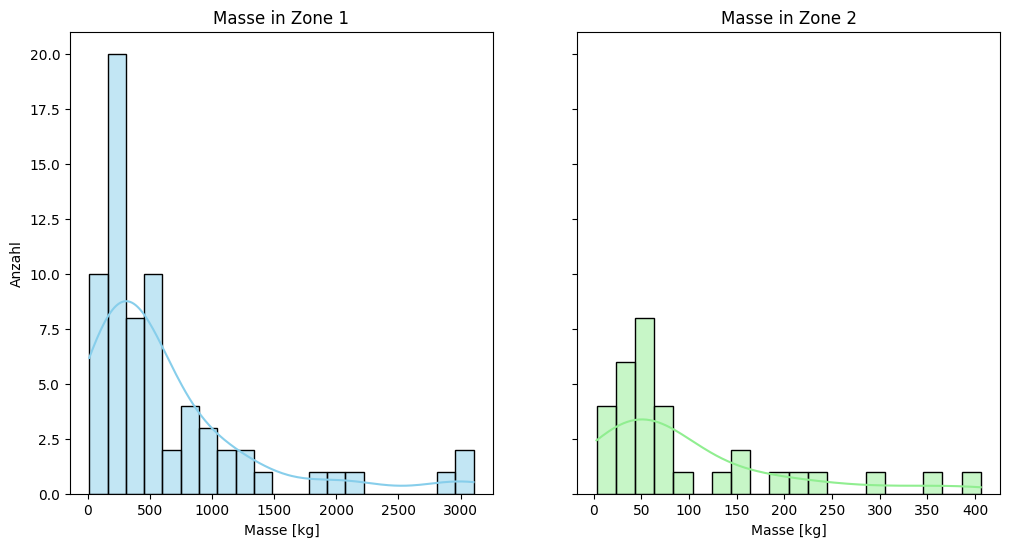

In [33]:
# plot histogram for Masse
plot_hist('Masse [kg]', 150, 20, 'Masse in Zone 1', 'Masse in Zone 2')

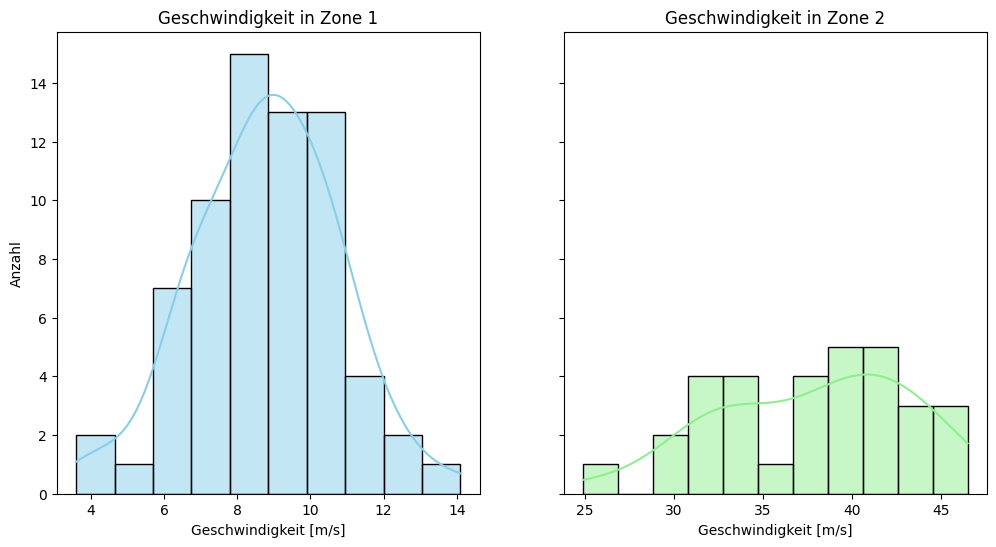

In [34]:
# plot histogram for Geschwindigkeit
plot_hist('Geschwindigkeit [m/s]', 1, 2, 'Geschwindigkeit in Zone 1', 'Geschwindigkeit in Zone 2')

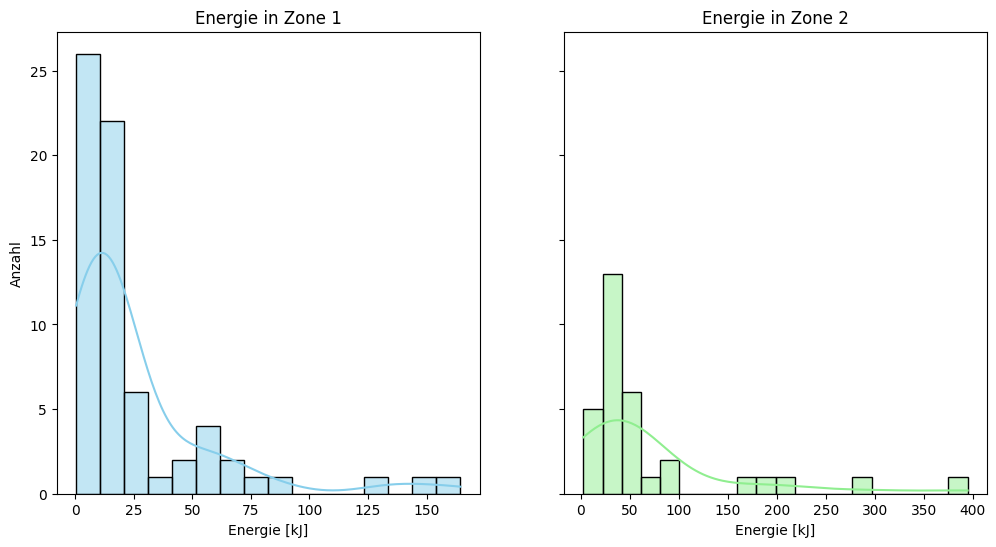

In [35]:
# plot histogram for Energie
plot_hist('Energie [kJ]', 10, 20, 'Energie in Zone 1', 'Energie in Zone 2')

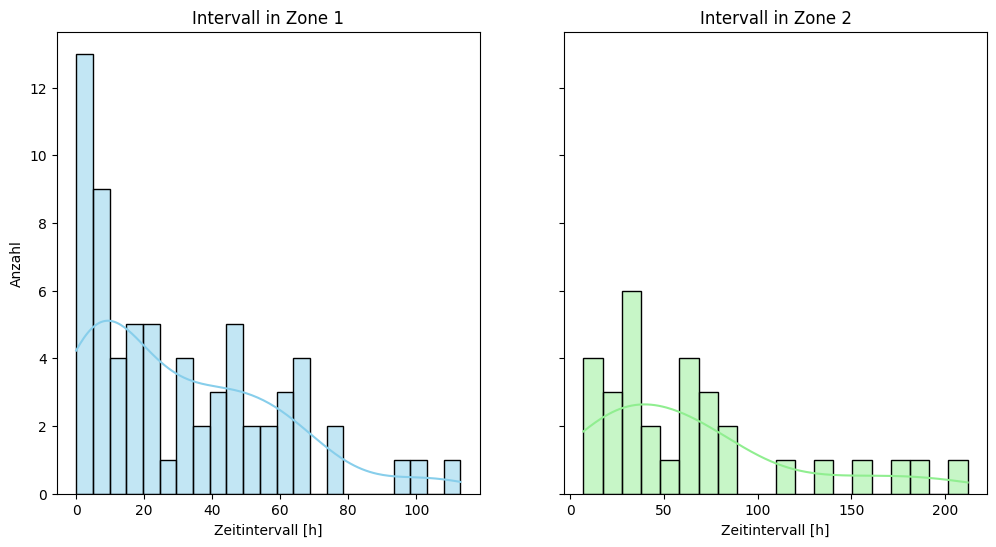

In [36]:
# plot histogram for Zeitintervall
plot_hist('Zeitintervall [h]', 5, 10, 'Intervall in Zone 1', 'Intervall in Zone 2')

### Boxplots

In [37]:
# function for boxplot
def plot_boxplot(feature: str, title: str) -> None:
    
    # 2 subplots above each other
    fig, ax = plt.subplots(figsize=(10, 6))

    # boxplot df1
    sns.boxplot(df1, x = feature, color='skyblue', orient='h', positions=[0], width=0.6)

    # boxplot df2
    sns.boxplot(df2, x = feature, color='lightgreen', orient='h', positions=[1], width=0.6)

    # label y axis
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Zone 1', 'Zone 2'])
    plt.ylim(-0.5, 1.5)

    # titel
    plt.title(title)
    plt.xlabel(feature)

    plt.show()

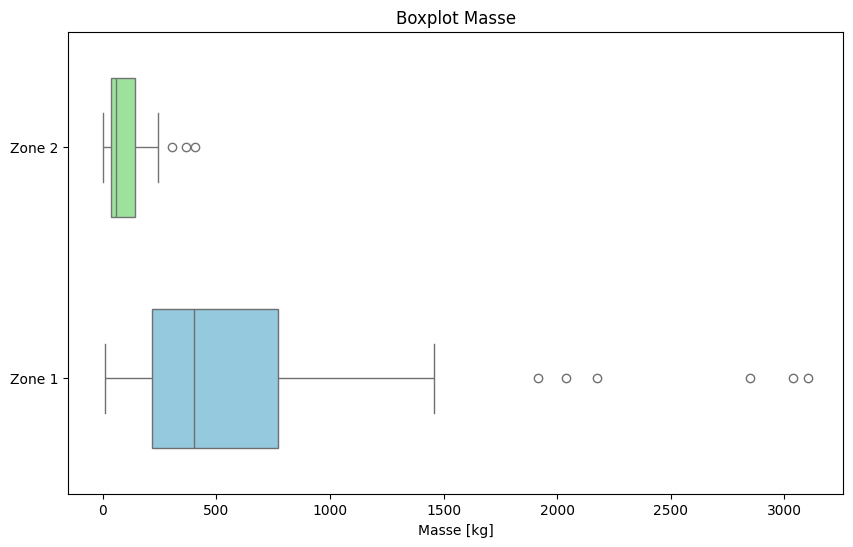

In [38]:
# boxplot for Masse
plot_boxplot('Masse [kg]', 'Boxplot Masse')

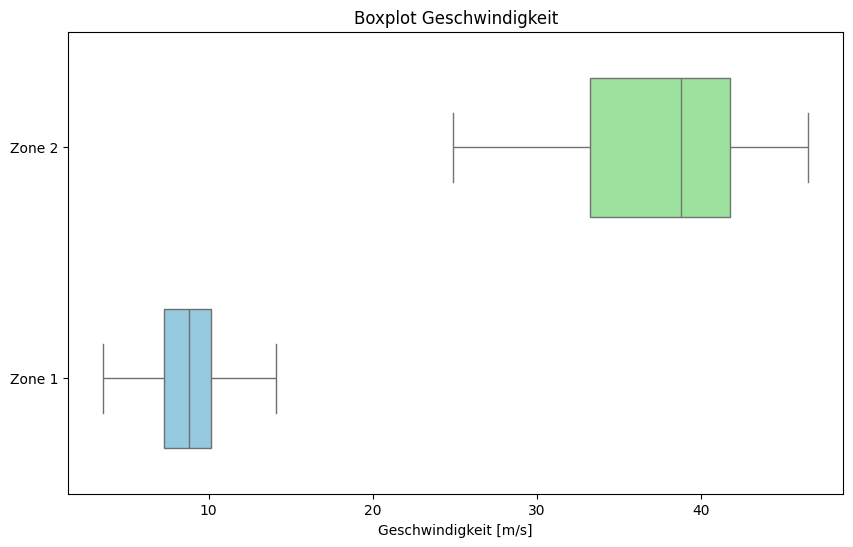

In [39]:
# boxplot for Geschwindigkeit
plot_boxplot('Geschwindigkeit [m/s]', 'Boxplot Geschwindigkeit')

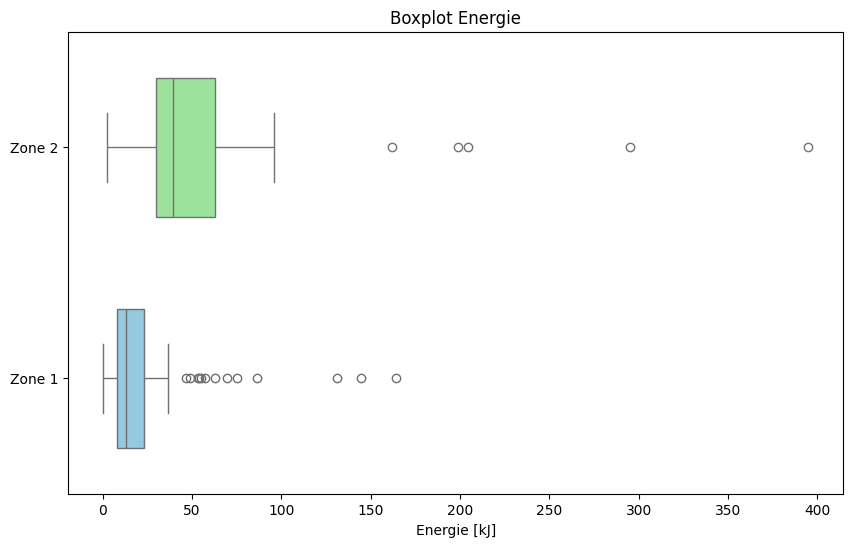

In [40]:
# boxplot for Energie
plot_boxplot('Energie [kJ]', 'Boxplot Energie')

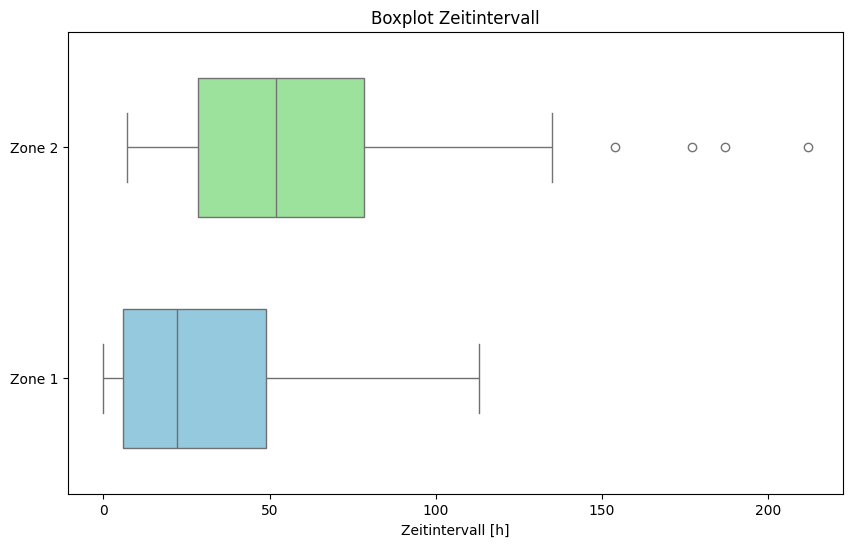

In [41]:
# boxplot for Zeitintervall
plot_boxplot('Zeitintervall [h]', 'Boxplot Zeitintervall')

### Scatterplots

In [42]:
# add Zone
df1['Zone'] = 'Zone 1'
df2['Zone'] = 'Zone 2'

# combine df1 and df2
df_combined = pd.concat([df1, df2])

# function for scatterplot
def plot_scatter(feature_1: str, feature_2: str, title: str) -> None:

    # scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(df_combined, x=feature_1, y=feature_2, hue='Zone', palette=['skyblue', 'lightgreen'])

    # labels
    plt.title(title)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)

    plt.show()

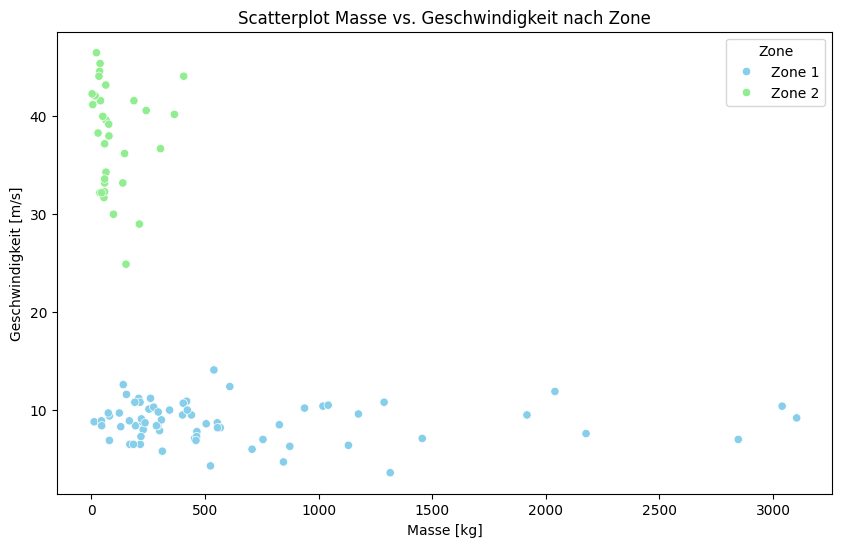

In [43]:
# scatterplot Masse vs. Geschwindigkeit
plot_scatter('Masse [kg]', 'Geschwindigkeit [m/s]', 'Scatterplot Masse vs. Geschwindigkeit nach Zone')

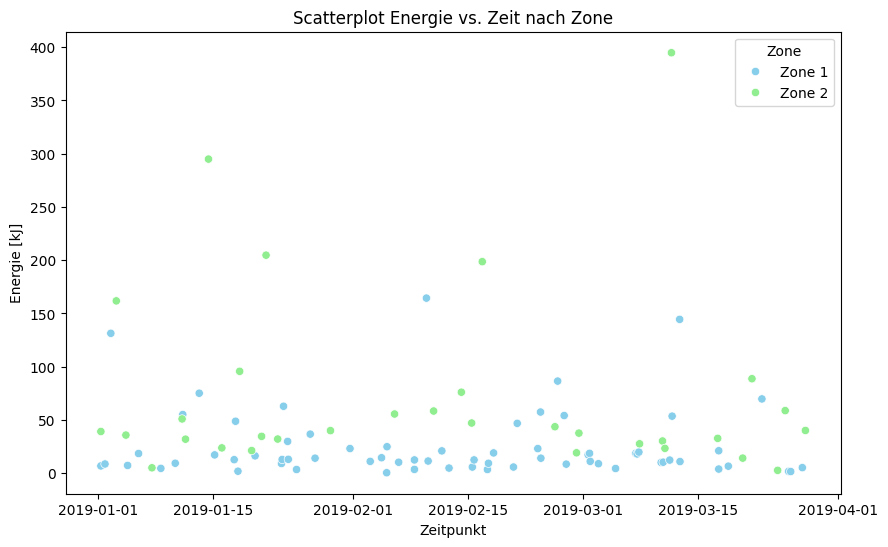

In [44]:
# scatterplot Energie vs. Zeit
plot_scatter('Zeitpunkt', 'Energie [kJ]', 'Scatterplot Energie vs. Zeit nach Zone')

## Erkentnis
Die Visualisierungen zeigen unterschiedliche Verteilungen von Masse, Geschwindigkeit und Zeitintervalle für Zone 1 und 2.  
Die beiden Zonen werden wir deshalb weiterhin separat betrachten.

Da wir zuwenige Daten für eine Beurteilung des Risikos haben, generieren wir mehr Daten durch eine Monte Carlo Simulation mit den Zufallsvariablen Masse, Geschwindigkeit und Zeitintervall. Dazu schauen wir uns zuerst ihre Verteilung anhanhd eines fittings an.

### Beste Verteilung finden

In [45]:
# import additional libraries
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats

# extract variables from df and create a dataset dictionary
dataset = {
    'masse_1': {
        'data': df1['Masse [kg]'].values,
        'fitter': None  # Placeholder
    },
    'masse_2': {
        'data': df2['Masse [kg]'].values,
        'fitter': None  # Placeholder
    },
    'geschwindigkeit_1': {
        'data': df1['Geschwindigkeit [m/s]'].values,
        'fitter': None  # Placeholder
    },
    'geschwindigkeit_2': {
        'data': df2['Geschwindigkeit [m/s]'].values,
        'fitter': None  # Placeholder
    },
    'zeitintervall_1': {
        'data': df1['Zeitintervall [h]'].values,
        'fitter': None  # Placeholder
    },
    'zeitintervall_2': {
        'data': df2['Zeitintervall [h]'].values,
        'fitter': None  # Placeholder
    },
}

# Remove NaN values from zeitintervall_1 and zeitintervall_2
dataset['zeitintervall_1']['data'] = dataset['zeitintervall_1']['data'][~np.isnan(dataset['zeitintervall_1']['data'])]
dataset['zeitintervall_2']['data'] = dataset['zeitintervall_2']['data'][~np.isnan(dataset['zeitintervall_2']['data'])]


In [46]:
# fitting function
def fit_and_display_summary(title: str, distribution=get_common_distributions()) -> None:
    f = Fitter(dataset[title]['data'], distributions=distribution)
    f.fit()
    summary = f.summary()
    dataset[title]['fitter'] = f
    print(f"\n**{title.upper()}**")
    display(summary)
    plt.show()


2024-03-20 22:53:21.635 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.5e-05)
2024-03-20 22:53:21.679 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.6e-05)
2024-03-20 22:53:21.683 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3.6e-05)
2024-03-20 22:53:21.693 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=4.6e-05)
2024-03-20 22:53:21.709 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.9e-05)
2024-03-20 22:53:21.710 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.8e-05)
2024-03-20 22:53:21.711 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=2.8e-05)
2024-03-20 22:53:21.712 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw 


**MASSE_1**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000015,1810.753526,1817.412049,inf,0.065387,0.914829
cauchy,0.000018,1940.238453,1944.677468,inf,0.180140,0.021090
expon,0.000019,1790.287904,1794.726919,inf,0.112432,0.331307
gamma,0.000021,1765.999570,1772.658093,inf,0.117606,0.281179
exponpow,0.000025,1710.846111,1717.504634,inf,0.205474,0.005390


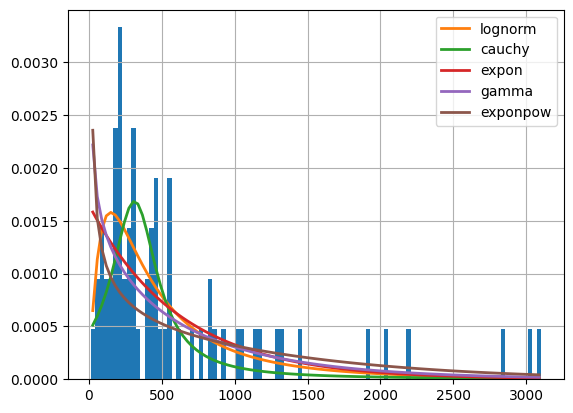

2024-03-20 22:53:21.819 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.001738)
2024-03-20 22:53:21.879 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.002752)
2024-03-20 22:53:21.882 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.001983)
2024-03-20 22:53:21.890 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.00207)
2024-03-20 22:53:21.905 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.002088)
2024-03-20 22:53:21.917 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.002624)
2024-03-20 22:53:21.918 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.00239)
2024-03-20 22:53:21.919 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted


**MASSE_2**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.001738,1510.918873,1513.850345,inf,0.190832,0.170510
lognorm,0.001983,1356.260077,1360.657285,inf,0.138634,0.525008
expon,0.002070,1332.083403,1335.014874,inf,0.157689,0.365264
gamma,0.002088,1332.656086,1337.053294,inf,0.151540,0.413322
exponpow,0.002170,1303.743237,1308.140445,inf,0.196140,0.148793


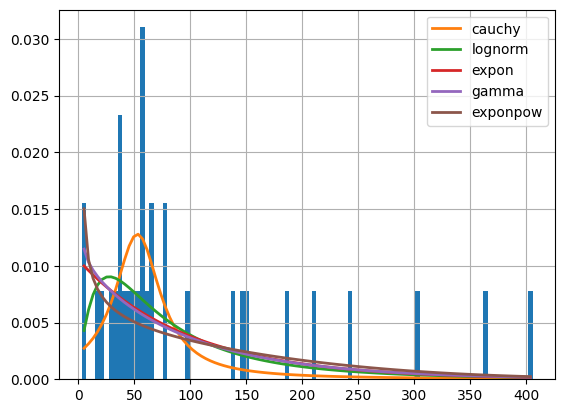

2024-03-20 22:53:22.064 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.840118)
2024-03-20 22:53:22.065 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.007418)
2024-03-20 22:53:22.072 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.107997)
2024-03-20 22:53:22.073 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=1.656107)
2024-03-20 22:53:22.081 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1.007418)
2024-03-20 22:53:22.113 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1.04792)
2024-03-20 22:53:22.119 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1.017533)
2024-03-20 22:53:22.120 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted ga


**GESCHWINDIGKEIT_1**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.007418,559.582300,564.021316,inf,0.059355,0.958730
lognorm,1.007418,561.582245,568.240768,inf,0.059355,0.958727
gamma,1.010142,560.352868,567.011391,inf,0.063807,0.928074
chi2,1.017533,558.084152,564.742675,inf,0.075881,0.800376
exponpow,1.047920,542.377735,549.036258,inf,0.073655,0.827877


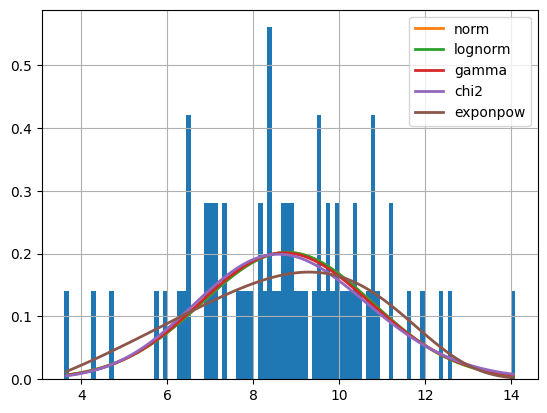

2024-03-20 22:53:22.242 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.62628)
2024-03-20 22:53:22.256 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.607154)
2024-03-20 22:53:22.263 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.741294)
2024-03-20 22:53:22.264 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.607154)
2024-03-20 22:53:22.277 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.622911)
2024-03-20 22:53:22.310 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1.19244)
2024-03-20 22:53:22.312 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.608798)
2024-03-20 22:53:22.313 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted


**GESCHWINDIGKEIT_2**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.607154,675.068739,678.000211,inf,0.104641,0.839121
lognorm,0.607154,677.069040,681.466248,inf,0.104643,0.839108
chi2,0.608647,677.413072,681.810279,inf,0.113398,0.763308
gamma,0.608798,677.225194,681.622402,inf,0.113424,0.763071
uniform,0.622910,618.538663,621.470135,inf,0.221065,0.074555


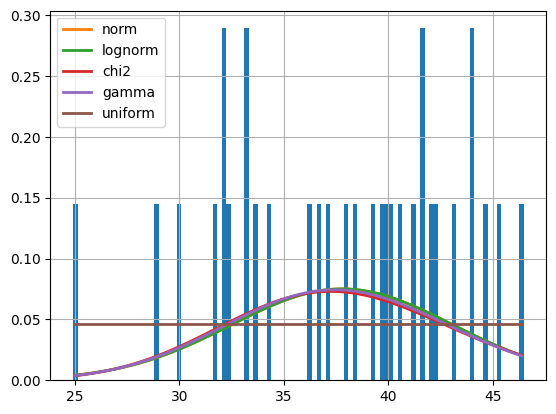

2024-03-20 22:53:22.475 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.10304)
2024-03-20 22:53:22.487 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.024112)
2024-03-20 22:53:22.491 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.017465)
2024-03-20 22:53:22.499 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.015866)
2024-03-20 22:53:22.540 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.015912)
2024-03-20 22:53:22.542 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.016328)
2024-03-20 22:53:22.543 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.01522)
2024-03-20 22:53:22.543 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted e


**ZEITINTERVALL_1**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.009903,1099.225071,1105.839149,inf,0.176573,2.681675e-02
exponpow,0.010509,1008.532772,1015.146850,inf,0.147101,9.931209e-02
expon,0.010841,1057.745923,1062.155308,inf,0.108669,3.800517e-01
rayleigh,0.015220,1064.859866,1069.269251,inf,0.164622,4.694483e-02
powerlaw,0.015866,1388.602201,1395.216279,inf,0.784941,2.317518e-44


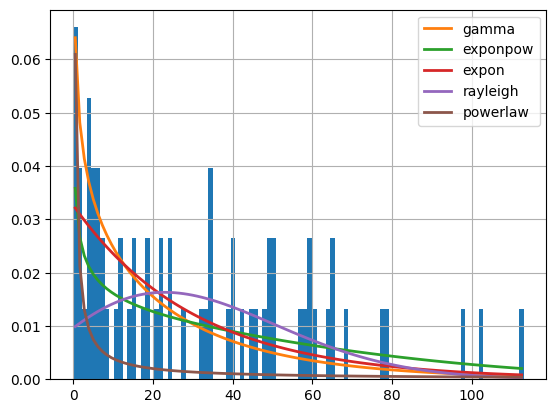

2024-03-20 22:53:22.743 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.008516)
2024-03-20 22:53:22.757 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.008385)
2024-03-20 22:53:22.757 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.006666)
2024-03-20 22:53:22.761 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.008268)
2024-03-20 22:53:22.782 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.007101)
2024-03-20 22:53:22.783 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.006538)
2024-03-20 22:53:22.784 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0075)
2024-03-20 22:53:22.784 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted 


**ZEITINTERVALL_2**


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.006538,1143.938900,1148.240861,inf,0.118612,0.731707
expon,0.006666,1166.166248,1169.034222,inf,0.092643,0.930581
gamma,0.006776,1182.198258,1186.500220,inf,0.174083,0.271495
chi2,0.007101,1212.047730,1216.349692,inf,0.222529,0.078924
rayleigh,0.007477,1159.491889,1162.359863,inf,0.172056,0.283939


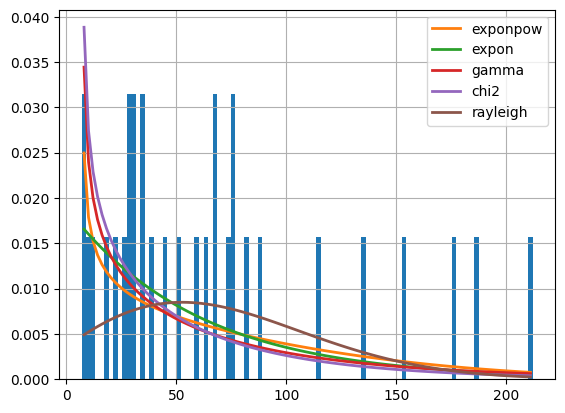

In [47]:
# let's fit them all
for key in dataset.keys():
    fit_and_display_summary(key)
    # more exact, but takes a lot of time
    # fit_and_display_summary(key, get_distributions())

### QQ Plot
A Q-Q (quantile-quantile) plot is a graphical tool used to compare two probability distributions by plotting their quantiles against each other.  
Here’s how a Q-Q plot works and what it tells you:

Plot Points: Each point on the plot represents a quantile in your sample data plotted against the corresponding quantile of the theoretical distribution.  

Interpreting the Plot:
If the data follow the theoretical distribution, the points will approximately lie on a straight line.
Deviations from the straight line indicate deviations from the theoretical distribution. For example, a curve deviating upward at the ends suggests a "heavier tail" than the theoretical distribution.

In [48]:
# # function for qq-plot
def plot_qq(title: str) -> None:
    # plt.figure(figsize=(10, 6))
    print(f"\n**{title.upper()}**")
    print(f"Best distribution: {dataset[title]['fitter'].get_best(method='sumsquare_error')}")
    best_distribution = list(dataset[title]['fitter'].get_best(method='sumsquare_error').keys())[0]
    data = dataset[title]['data']
    params = dataset[title]['fitter'].fitted_param[best_distribution]
    dist = getattr(stats, best_distribution)
    stats.probplot(data, dist=dist, sparams=params, plot=plt)
    plt.title(f'QQ-Plot {title} - {best_distribution}')
    plt.show()


**MASSE_1**
Best distribution: {'lognorm': {'s': 0.9434775287825837, 'loc': -21.3742551744583, 'scale': 418.05460294547083}}


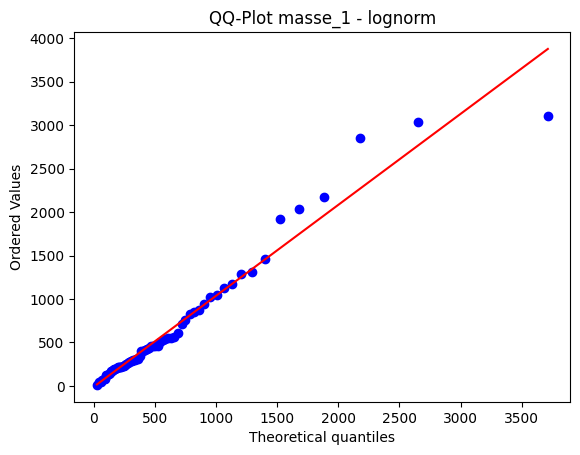


**MASSE_2**
Best distribution: {'cauchy': {'loc': 52.76182227525061, 'scale': 24.885448181743413}}


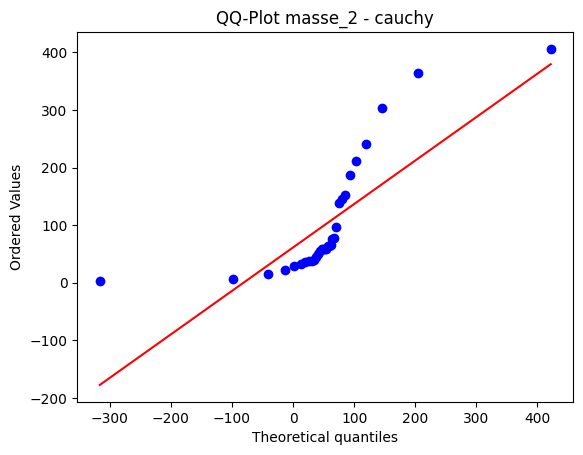


**GESCHWINDIGKEIT_1**
Best distribution: {'norm': {'loc': 8.788235294117646, 'scale': 1.9745088303442118}}


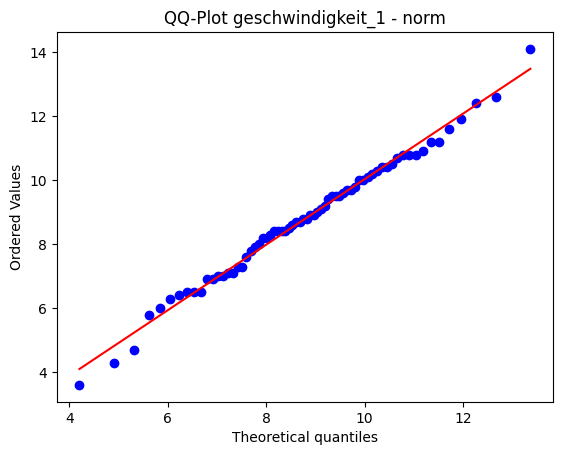


**GESCHWINDIGKEIT_2**
Best distribution: {'norm': {'loc': 37.790625, 'scale': 5.31080027956004}}


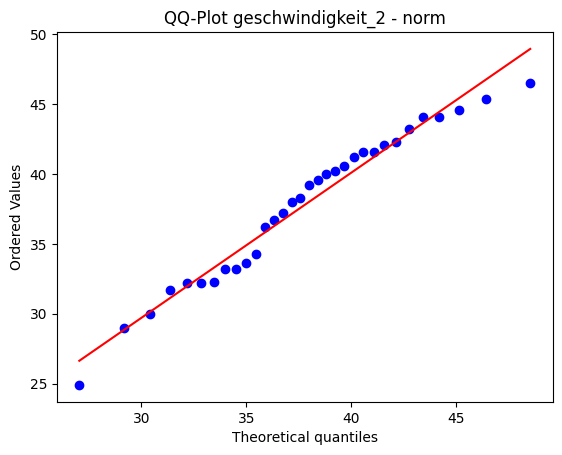


**ZEITINTERVALL_1**
Best distribution: {'gamma': {'a': 0.7720943019445038, 'loc': -1.9161057555859257e-24, 'scale': 32.180388903454435}}


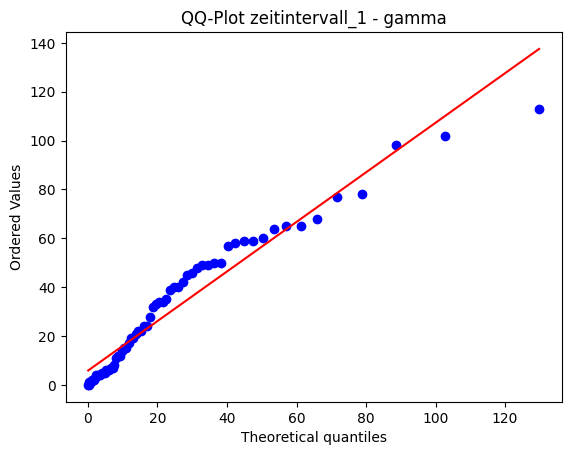


**ZEITINTERVALL_2**
Best distribution: {'exponpow': {'b': 0.6970979975450671, 'loc': 6.999999999999998, 'scale': 117.24485615947566}}


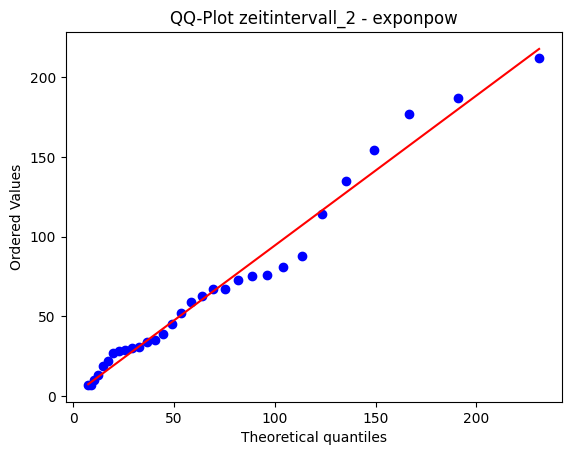

In [49]:
# let's qq-plot them all
for key in dataset.keys():
    plot_qq(key)

Tipps Rocco

qq plot selbst programieren
graphiken fitter nicht nützlich
bei qq plot auf den interesanten bereich ( masse hoch, geschwindigkeit hoch) fokusieren


Um den Bremsweg auf nasser Straße zu berechnen, wenn ein Auto mit 60 km/h fährt und eine Reaktionszeit von einer Sekunde angenommen wird, können wir die folgende Formel verwenden:

Reaktionsweg = Geschwindigkeit (in m/s) × Reaktionszeit (in Sekunden)
Bremsweg = (Geschwindigkeit (in m/s)²) / (2 × Bremsverzögerung (in m/s²))
Die Bremsverzögerung auf nasser Straße kann im Durchschnitt etwa 5 m/s² betragen. Die Geschwindigkeit muss von km/h in m/s umgerechnet werden, da die Formeln in Meter pro Sekunde (m/s) arbeiten. Die Umrechnung erfolgt mit dem Faktor 1 km/h = 0,27778 m/s.

Lassen Sie uns diese Berechnungen durchführen.
Der Reaktionsweg beträgt etwa 16,67 Meter, der Bremsweg auf nasser Straße etwa 27,78 Meter. Somit ergibt sich ein Gesamtweg von etwa 44,45 Metern, bis das Auto zum Stillstand kommt, wenn es mit 60 km/h fährt und eine Reaktionszeit von einer Sekunde hat. ​​

Um zu berechnen, wie lange ein Auto braucht, um eine Strecke von 50 Metern mit einer Geschwindigkeit von 60 km/h zu durchfahren, können wir die folgende Formel verwenden:

​	

Da die Geschwindigkeit in km/h gegeben ist und die Strecke in Metern, müssen wir die Geschwindigkeit von km/h in m/s umrechnen, um konsistente Einheiten zu haben. Wir verwenden dafür den Umrechnungsfaktor 1 km/h = 0,27778 m/s.

Lassen Sie uns die Berechnung durchführen.
Das Auto benötigt etwa 3 Sekunden, um eine Strecke von 50 Metern mit einer Geschwindigkeit von 60 km/h zu durchfahren. ​​

Um die Wahrscheinlichkeit zu berechnen, dass ein Auto von einem Stein getroffen wird, wenn in einer Steinschlagzone einmal pro 24 Stunden ein Stein auf die Straße fällt und in 24 Stunden 600 Autos mit 60 km/h dort durchfahren, gehen wir wie folgt vor:

Berechnung der Zeit, die ein Auto benötigt, um die Gefahrenzone zu durchqueren: Wir haben bereits berechnet, dass ein Auto bei einer Geschwindigkeit von 60 km/h etwa 3 Sekunden benötigt, um eine bestimmte Strecke (in diesem Fall nehmen wir 50 Meter als Beispiel) zu durchqueren. Diese Zeit wird als die "exponierte" Zeit angesehen, in der das Auto einem Risiko ausgesetzt ist.
Berechnung der "sicheren" Zeit pro Tag: Da ein Stein einmal pro 24 Stunden fällt, ist die Zeit, in der ein Stein nicht fällt, 24 Stunden minus die Zeit, die ein Stein benötigt, um zu fallen. Da wir jedoch nicht wissen, wie lange der Stein zum Fallen benötigt und davon ausgehen, dass der Fallmoment sehr kurz im Vergleich zu 24 Stunden ist, können wir für unsere Berechnungen die gesamten 24 Stunden (abzüglich der exponierten Zeit jedes Autos) als "sichere" Zeit betrachten. Diese Annahme vereinfacht das Modell erheblich, ohne einen signifikanten Fehler einzuführen, da die Expositionszeit eines einzelnen Autos im Vergleich zum gesamten Tag minimal ist.
Berechnung der kumulativen exponierten Zeit aller Autos: Mit 600 Autos, die durch die Zone fahren, und jeder verbringt etwa 3 Sekunden in der Zone, können wir die gesamte Zeit berechnen, in der irgendein Auto einem Risiko ausgesetzt ist.
Berechnung der Wahrscheinlichkeit, dass ein Auto getroffen wird: Die Wahrscheinlichkeit, dass ein Auto getroffen wird, kann als Verhältnis der kumulativen exponierten Zeit aller Autos zur Gesamtdauer des Tages (in Sekunden) berechnet werden.
Lassen Sie uns diese Berechnungen durchführen:
Die kumulative exponierte Zeit aller Autos beträgt etwa 1800 Sekunden, oder anders gesagt, die Autos sind insgesamt 30 Minuten des Tages in der Gefahrenzone exponiert. Die Wahrscheinlichkeit, dass ein Auto von einem Stein getroffen wird, beträgt somit etwa 2,08%.

Das bedeutet, unter den gegebenen Bedingungen wird ungefähr jedes 48. Auto von einem Stein getroffen, wenn in einer Steinschlagzone einmal pro 24 Stunden ein Stein auf die Straße fällt und 600 Autos mit 60 km/h dort durchfahren.